# Diamond Price Prediction Using LR

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
data=pd.read_csv("C:\\Users\\adhau\\Downloads\\diamonds.csv")

In [19]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [22]:
data.shape

(53940, 10)

In [25]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Defining Target Variable And Feature Variable

In [26]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [28]:
X=data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]

In [29]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [30]:
y=data['price']

In [31]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [35]:
y.shape

(53940,)

## Detecting Outliers

C:\Users\adhau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

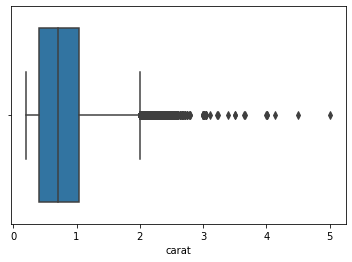

In [34]:
sns.boxplot(data.carat)

C:\Users\adhau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

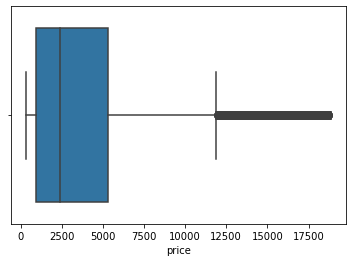

In [38]:
sns.boxplot(data.price)

## Counting

AttributeError: module 'seaborn' has no attribute 'figsize'

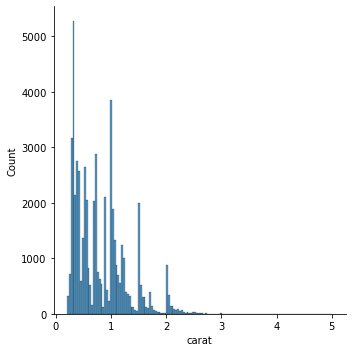

In [42]:
sns.displot(data = data, x='carat', kind='hist')

## Spliting Data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [47]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29477,0.32,Ideal,F,VS1,61.3,56.0,4.40,4.44,2.71
52542,0.72,Very Good,I,VVS2,61.7,55.0,5.76,5.81,3.57
8725,0.38,Very Good,D,SI1,62.0,55.0,4.67,4.72,2.91
15577,1.00,Very Good,H,VVS2,62.6,56.0,6.36,6.39,3.99
19651,1.70,Premium,H,SI2,59.8,61.0,7.67,7.62,4.57


In [49]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [50]:
y_train.head()

29477     702
52542    2532
8725      586
15577    6249
19651    8263
Name: price, dtype: int64

In [51]:
y_test.head()

52264    2491
21073    9248
42161    1284
35974     921
7641     4268
Name: price, dtype: int64

In [56]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(37758, 9) (37758,)
(16182, 9) (16182,)


## Seperating Numerical and Categorical Columns

In [58]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29477,0.32,Ideal,F,VS1,61.3,56.0,4.40,4.44,2.71
52542,0.72,Very Good,I,VVS2,61.7,55.0,5.76,5.81,3.57
8725,0.38,Very Good,D,SI1,62.0,55.0,4.67,4.72,2.91
15577,1.00,Very Good,H,VVS2,62.6,56.0,6.36,6.39,3.99
19651,1.70,Premium,H,SI2,59.8,61.0,7.67,7.62,4.57


In [59]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
29477,Ideal,F,VS1
52542,Very Good,I,VVS2
8725,Very Good,D,SI1
15577,Very Good,H,VVS2
19651,Premium,H,SI2


In [60]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
29477,0.32,61.3,56.0,4.40,4.44,2.71
52542,0.72,61.7,55.0,5.76,5.81,3.57
8725,0.38,62.0,55.0,4.67,4.72,2.91
15577,1.00,62.6,56.0,6.36,6.39,3.99
19651,1.70,59.8,61.0,7.67,7.62,4.57


In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
29477,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8725,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19651,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
X_train.cut.value_counts()

Ideal        15116
Premium       9599
Very Good     8458
Good          3475
Fair          1110
Name: cut, dtype: int64

In [67]:
X_train.clarity.value_counts()

SI1     9141
VS2     8544
SI2     6410
VS1     5745
VVS2    3595
VVS1    2587
IF      1231
I1       505
Name: clarity, dtype: int64

In [68]:
X_train.color.value_counts()

G    7945
E    6862
F    6739
H    5799
D    4640
I    3785
J    1988
Name: color, dtype: int64

In [70]:
X_train.color.unique()

array(['F', 'I', 'D', 'H', 'G', 'E', 'J'], dtype=object)

In [71]:
X_train.clarity.unique()

array(['VS1', 'VVS2', 'SI1', 'SI2', 'VVS1', 'VS2', 'I1', 'IF'],
      dtype=object)

In [72]:
X_train.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [80]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
29477
52542
8725
15577
19651


In [82]:
X_train.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [84]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
29477,4
52542,3
8725,3
15577,3
19651,5


In [85]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
29477,4,5
52542,3,2
8725,3,7
15577,3,3
19651,5,3


In [86]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
29477,4,5,5
52542,3,2,6
8725,3,7,3
15577,3,3,6
19651,5,3,2


## Numerical Data Scaling

In [87]:
X_train_num.head()

,carat,depth,table,x,y,z
29477,0.32,61.3,56.0,4.40,4.44,2.71
52542,0.72,61.7,55.0,5.76,5.81,3.57
8725,0.38,62.0,55.0,4.67,4.72,2.91
15577,1.00,62.6,56.0,6.36,6.39,3.99
19651,1.70,59.8,61.0,7.67,7.62,4.57


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
29477,-1.007784,-0.316595,-0.647912,-1.187006,-1.122457,-1.191717
52542,-0.166198,-0.038325,-1.095448,0.023744,0.062997,0.043156
8725,-0.881547,0.170377,-1.095448,-0.946636,-0.880174,-0.904537
15577,0.422912,0.587782,-0.647912,0.557898,0.564868,0.646234
19651,1.895688,-1.360107,1.589767,1.724135,1.629180,1.479055


In [89]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
29477,-1.007784,-0.316595,-0.647912,-1.187006,-1.122457,-1.191717,4,5,5
52542,-0.166198,-0.038325,-1.095448,0.023744,0.062997,0.043156,3,2,6
8725,-0.881547,0.170377,-1.095448,-0.946636,-0.880174,-0.904537,3,7,3
15577,0.422912,0.587782,-0.647912,0.557898,0.564868,0.646234,3,3,6
19651,1.895688,-1.360107,1.589767,1.724135,1.629180,1.479055,5,3,2


## Test Data

In [90]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [91]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [92]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [93]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
52264,-0.481793,-0.177460,-0.200377,-0.341261,-0.360998,-0.373255
21073,0.759547,-0.177460,-1.095448,0.905098,0.928292,0.904696
42161,-0.608031,1.005187,0.247159,-0.608339,-0.568668,-0.488127
35974,-0.797388,-0.803567,-0.647912,-0.804195,-0.750380,-0.861460
7641,0.002119,0.587782,0.247159,0.139477,0.166832,0.229823


In [94]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
52264
21073
42161
35974
7641


In [95]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [96]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.481793,-0.177460,-0.200377,-0.341261,-0.360998,-0.373255,4,6,4
21073,0.759547,-0.177460,-1.095448,0.905098,0.928292,0.904696,4,4,5
42161,-0.608031,1.005187,0.247159,-0.608339,-0.568668,-0.488127,4,4,3
35974,-0.797388,-0.803567,-0.647912,-0.804195,-0.750380,-0.861460,4,5,5
7641,0.002119,0.587782,0.247159,0.139477,0.166832,0.229823,5,4,8


## Model

In [97]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [99]:
y_pred=regressor.predict(X_test_transformed)

In [101]:
pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

,Actual,Predicted
52264,2491,2363.834740
21073,9248,7469.644228
42161,1284,643.298938
35974,921,1516.808210
7641,4268,5721.128606
...,...,...
10135,4721,4684.114850
1637,3017,3151.237333
43518,1424,1481.353271
33364,827,724.090894
